## LDA With Gensim

## Load the dataset


In [113]:
import pandas as pd

data = pd.read_csv('preprocessing_crawling_pta.csv', on_bad_lines='skip')

data.head()

,id_berita,judul_berita,isi_berita_original,isi_berita_clean,isi_berita_stopwords_removed,isi_berita_stemmed,isi_berita_corrected,isi_berita_tokens,kategori_berita
0,8142500,5 Catatan Legislator PAN soal Perpres Tata Kel...,Presiden Prabowo Subianto disebut bakal meneke...,presiden prabowo subianto disebut bakal meneke...,presiden prabowo subianto disebut bakal meneke...,presiden prabowo subianto sebut bakal teken at...,president prabowo subito debut banal taken amu...,presiden prabowo subianto disebut bakal meneke...,politik
1,8142495,Kakek di Sumsel Tega Perkosa Anak Tiri Usia 15...,Seorang pria lansia di Kabupaten Ogan Komering...,seorang pria lansia di kabupaten ogan komering...,seorang pria lansia kabupaten ogan komering ul...,orang pria lansia kabupaten ogan komering ulu ...,orang aria mania kabupaten organ homering flu ...,seorang pria lansia di kabupaten ogan komering...,politik
2,8142492,Cak Imin Angkat 4 Korban Selamat Ponpes Ambruk...,Menteri Koordinator Bidang Pemberdayaan Masyar...,menteri koordinator bidang pemberdayaan masyar...,menteri koordinator bidang pemberdayaan masyar...,menteri koordinator bidang daya masyarakat men...,enter coordinator biding day masyarakat men pm...,menteri koordinator bidang pemberdayaan masyar...,politik
3,8142488,KPK Kesulitan Periksa Saksi Kasus Suap PLTU-2 ...,KPKmengakui kesulitan dalam memeriksa saksi te...,kpkmengakui kesulitan dalam memeriksa saksi te...,kpkmengakui kesulitan memeriksa saksi terkait ...,kpkmengakui sulit periksa saksi kait perkara s...,kpkmengakui suit perish saki wait ferrara slap...,kpkmengakui kesulitan dalam memeriksa saksi te...,politik
4,8142485,Respons KPK soal Staf Ahli Kemensos Ngaku Korb...,KPKmerespons pernyataan Staf Ahli Menteri Bida...,kpkmerespons pernyataan staf ahli menteri bida...,kpkmerespons pernyataan staf ahli menteri bida...,kpkmerespons nyata staf ahli menteri bidang ub...,kpkmerespons nyala stay ali enter biding bah d...,kpkmerespons pernyataan staf ahli menteri bida...,politik


In [ ]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['isi_berita_original']]

# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'.
documents = data_text

# Tampilkan semua baris data
print(documents)

                                   isi_berita_original
0    Presiden Prabowo Subianto disebut bakal meneke...
1    Seorang pria lansia di Kabupaten Ogan Komering...
2    Menteri Koordinator Bidang Pemberdayaan Masyar...
3    KPKmengakui kesulitan dalam memeriksa saksi te...
4    KPKmerespons pernyataan Staf Ahli Menteri Bida...
..                                                 ...
620  Direktorat Reserse Siber Polda Metro Jaya mena...
621  Pemerintah mewajibkan Satuan Pelayanan Pemenuh...
622  Gardu tol di Pejompongan diTol Dalam Kotaditut...
623  Seorang perempuan terapisditemukan tidak berny...
624  Sejumlah remaja di Bitung, Sulawesi Utara (Sul...

[625 rows x 1 columns]


In [115]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['isi_berita_original']]
data_text['index'] = data_text.index

# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'
documents = data_text

# Tampilkan semua baris data
print(documents)

                                   isi_berita_original  index
0    Presiden Prabowo Subianto disebut bakal meneke...      0
1    Seorang pria lansia di Kabupaten Ogan Komering...      1
2    Menteri Koordinator Bidang Pemberdayaan Masyar...      2
3    KPKmengakui kesulitan dalam memeriksa saksi te...      3
4    KPKmerespons pernyataan Staf Ahli Menteri Bida...      4
..                                                 ...    ...
620  Direktorat Reserse Siber Polda Metro Jaya mena...    620
621  Pemerintah mewajibkan Satuan Pelayanan Pemenuh...    621
622  Gardu tol di Pejompongan diTol Dalam Kotaditut...    622
623  Seorang perempuan terapisditemukan tidak berny...    623
624  Sejumlah remaja di Bitung, Sulawesi Utara (Sul...    624

[625 rows x 2 columns]


In [116]:
len(documents)

625

## Data Preprocessing

In [117]:
pip install gensim

In [118]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [119]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [120]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :

        if token not in stopwords.words('english') and len(token) > 3:

            result.append(lemmatize_stemming(token))
    return result

In [121]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

# Unduh data NLTK
nltk.download('stopwords')
nltk.download('wordnet')

try:
    # Muat data dari file CSV
    data = pd.read_csv('preprocessing_crawling_pta.csv', on_bad_lines='skip')

    # KUNCI PERBAIKAN: Pastikan documents adalah list of strings
    documents = data['isi_berita_original'].values.tolist()

    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []


# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    # --- Bagian 3: Mencoba Mengakses Dokumen Tertentu ---
    # Tentukan nomor dokumen yang ingin Anda ambil
    # Berdasarkan output Anda, total dokumen adalah 625
    document_num = 581

    # Cek apakah nomor dokumen valid
    if 1 <= document_num <= len(documents):
        # Ambil dokumen menggunakan indeks list (document_num - 1)
        doc_sample = documents[document_num - 1]

        print("\nOriginal document:")
        words = doc_sample.split()
        print(words)

        print("\n\nTokenized and lemmatized document:")
        print(tokenisasi_dan_filter(doc_sample))
    else:
        print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total 625 dokumen berhasil dimuat.

Original document:
['Aksi', 'tawuran', 'antara', 'dua', 'kelompok', 'pelajar', 'SMP', 'terjadi', 'di', 'Kecamatan', 'Angsana,', 'Kabupaten', 'Pandeglang,', 'Banten.', 'Rekaman', 'video', 'tawuran', 'itu', 'tersebar', 'di', 'media', 'sosial.', 'Berdasarkan', 'video', 'viral', 'yang', 'dilihat,', "Jum'at", '(3/10/2025),', 'tampak', 'dua', 'kelompok', 'pelajar', 'saling', 'serang', 'dengan', 'menggunakan', 'senjata', 'tajam.', 'Dalam', 'video', 'itu,', 'mereka', 'terlihat', 'masih', 'mengenakan', 'seragam', 'sekolah.', 'SCROLL', 'TO', 'CONTINUE', 'WITH', 'CONTENT', 'Kapolsek', 'Angsana', 'Iptu', 'Akbar', 'angkat', 'bicara.', 'Ia', 'mengatakan', 'peristiwa', 'itu', 'terjadi', 'pada', 'Senin', '(29/9).', '"Iyah,', 'kejadian', 'pada', 'Senin', 'kemarin', 'usai', 'pulang', 'sekolah,"', 'katanya.', 'Akbar', 'mengatakan', 'para', 'siswa', 'yang', 'melakukan', 'aksi', 'itu', 'masih', 'duduk', 'di', 'bangku', 'sekolah', 'menengah', 'pertama', '(SMP).', 'Menurut

In [122]:
processed_docs = [preprocess(doc) for doc in data['isi_berita_original'].values]

In [123]:
processed_docs = data['isi_berita_original'].apply(preprocess)

print(processed_docs[:625])

0      [presiden, prabowo, subianto, disebut, bakal, ...
1      [seorang, pria, lansia, kabupaten, ogan, komer...
2      [menteri, koordinator, bidang, pemberdayaan, m...
3      [kpkmengakui, kesulitan, dalam, memeriksa, sak...
4      [kpkmerespons, pernyataan, staf, ahli, menteri...
                             ...                        
620    [direktorat, reserse, siber, polda, metro, jay...
621    [pemerintah, mewajibkan, satuan, pelayanan, pe...
622    [gardu, pejompongan, ditol, dalam, kotaditutup...
623    [seorang, perempuan, tidak, bernyawadi, sebuah...
624    [sejumlah, remaja, bitung, sulawesi, utara, su...
Name: isi_berita_original, Length: 625, dtype: object


## Get a BOW Dict from data

In [124]:
dictionary = gensim.corpora.Dictionary(processed_docs)

# Kode ini akan mengiterasi dan mencetak semua item dalam kamus
for k, v in dictionary.items():
    print(k, v)

0 adanya
1 agar
2 akan
3 akuntabel
4 akuntabilitas
5 aman
6 anak
7 anggaran
8 anggota
9 ashabul
10 aspek
11 baginya
12 baik
13 bakal
14 bambang
15 berbasis
16 berdampak
17 bergizi
18 berharap
19 berhenti
20 berlapis
21 berlebihan
22 berorientasi
23 besar
24 betul
25 catatan
26 cepat
27 content
28 continue
29 daerah
30 dalam
31 dapat
32 dapur
33 dari
34 dekat
35 dengan
36 diajukan
37 diatur
38 diharapkan
39 dijadikan
40 dikeluarkan
41 disebut
42 distribusi
43 ditarik
44 diteken
45 evaluasi
46 fraksi
47 gerak
48 gitu
49 gizi
50 gratis
51 hanya
52 harus
53 hasan
54 hasil
55 hingga
56 inpres
57 insyaallah
58 integrasi
59 isinya
60 jadi
61 jakarta
62 jangan
63 jangkar
64 jargon
65 jelas
66 jumat
67 kahfi
68 kamis
69 kanal
70 karena
71 kata
72 keamanan
73 kedua
74 keempat
75 kelima
76 kelola
77 kelolamakan
78 kementerian
79 kepada
80 keputusan
81 kesehatan
82 kesling
83 ketiga
84 kita
85 komisi
86 komunitas
87 koordinasi
88 labkesda
89 laboratorium
90 langkah
91 larangan
92 layanan
93 lebih


## filter the dict

In [125]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

## Convert document into BOW format by doc2bow

In [126]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [127]:
# Buat kamus (dictionary) untuk menyimpan total hitungan kata
total_word_counts = {}

# Iterasi melalui setiap dokumen di bow_corpus
for bow_doc in bow_corpus:
    # Iterasi melalui setiap pasangan word_id dan count dalam dokumen
    for word_id, count in bow_doc:
        # Dapatkan kata asli dari dictionary
        word = dictionary[word_id]

        # Tambahkan hitungan ke total word counts
        if word in total_word_counts:
            total_word_counts[word] += count
        else:
            total_word_counts[word] = count

# Urutkan kata-kata berdasarkan total hitungannya secara menurun
sorted_words = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)

# Cetak hitungan kata yang digabungkan untuk semua dokumen
print("Total hitungan kata untuk semua dokumen:")
for word, count in sorted_words:
    print(f"Kata '{word}' muncul {count} kali.")

Total hitungan kata untuk semua dokumen:
Kata 'marquez' muncul 290 kali.
Kata 'mandalika' muncul 242 kali.
Kata 'mobil' muncul 241 kali.
Kata 'korban' muncul 239 kali.
Kata 'pertamina' muncul 199 kali.
Kata 'harga' muncul 183 kali.
Kata 'bumn' muncul 175 kali.
Kata 'motor' muncul 156 kali.
Kata 'menit' muncul 155 kali.
Kata 'uang' muncul 153 kali.
Kata 'kendaraan' muncul 152 kali.
Kata 'badan' muncul 150 kali.
Kata 'instagram' muncul 150 kali.
Kata 'balapan' muncul 148 kali.
Kata 'marc' muncul 143 kali.
Kata 'kota' muncul 135 kali.
Kata 'laga' muncul 135 kali.
Kata 'nikita' muncul 133 kali.
Kata 'hukum' muncul 132 kali.
Kata 'poin' muncul 131 kali.
Kata 'swasta' muncul 129 kali.
Kata 'foto' muncul 129 kali.
Kata 'pelaku' muncul 125 kali.
Kata 'mirzani' muncul 125 kali.
Kata 'pasal' muncul 124 kali.
Kata 'data' muncul 123 kali.
Kata 'kabupaten' muncul 122 kali.
Kata 'produk' muncul 121 kali.
Kata 'benar' muncul 120 kali.
Kata 'daerah' muncul 117 kali.
Kata 'nomor' muncul 116 kali.
Kata 

## TF-IDF on our document set


In [128]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [129]:
corpus_tfidf = tfidf[bow_corpus]

In [130]:
for doc in corpus_tfidf:
    print(doc)

[(0, 0.05920355691653241), (1, 0.05861409118850359), (2, 0.05136105494683213), (3, 0.0699939586568626), (4, 0.052619300173366544), (5, 0.07453161484012184), (6, 0.13800360731398054), (7, 0.06545630247360332), (8, 0.1399879173137252), (9, 0.06900180365699027), (10, 0.05177187990340385), (11, 0.20225398443428036), (12, 0.1916738659267852), (13, 0.21989641332991086), (14, 0.07584401494209002), (15, 0.0580412323570343), (16, 0.05981062121226022), (17, 0.0710370151694376), (18, 0.07453161484012184), (19, 0.0710370151694376), (20, 0.1420740303388752), (21, 0.13091260494720663), (22, 0.1070071523475501), (23, 0.07213647988380549), (24, 0.0580412323570343), (25, 0.37265807420060926), (26, 0.054906556130219074), (27, 0.04942290874377352), (28, 0.04942290874377352), (29, 0.05442806008388616), (30, 0.0699939586568626), (31, 0.06043636731335064), (32, 0.11962124242452044), (33, 0.06315174737176285), (34, 0.06715187947389774), (35, 0.0710370151694376), (36, 0.07584401494209002), (37, 0.060436367313

## Running LDA using Bag of Words data

In [131]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=625,
                                       id2word = dictionary,
                                       passes = 50,
                                       workers=2)

In [132]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 103 
Words: 0.001*"olahraga" + 0.001*"positif" + 0.001*"atlet" + 0.001*"memperluas" + 0.001*"dukungan" + 0.001*"pelatih" + 0.001*"pengalaman" + 0.001*"hidup" + 0.001*"bermain" + 0.001*"semakin"


Topic: 230 
Words: 0.088*"erick" + 0.052*"thohir" + 0.043*"bapak" + 0.043*"prabowo" + 0.043*"marc" + 0.043*"atlet" + 0.043*"marquez" + 0.038*"triliun" + 0.036*"hampir" + 0.033*"sport"


Topic: 587 
Words: 0.136*"pembangunan" + 0.081*"kantor" + 0.046*"mendukung" + 0.042*"nusantara" + 0.042*"khususnya" + 0.041*"rencana" + 0.037*"bidang" + 0.028*"dukungan" + 0.028*"menyiapkan" + 0.028*"fasilitas"


Topic: 287 
Words: 0.001*"membeli" + 0.001*"maju" + 0.001*"umkm" + 0.001*"tenggara" + 0.001*"sering" + 0.001*"peserta" + 0.001*"bogor" + 0.001*"center" + 0.001*"karya" + 0.001*"terbaik"


Topic: 584 
Words: 0.001*"membeli" + 0.001*"maju" + 0.001*"umkm" + 0.001*"tenggara" + 0.001*"sering" + 0.001*"peserta" + 0.001*"bogor" + 0.001*"center" + 0.001*"karya" + 0.001*"terbaik"


Topic: 29 
Words: 0.24

## Topic coherence

In [133]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43695271489680654


In [134]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -3.441346362294248


## find the optimal number of topics

In [135]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Ubah 'passes' menjadi nilai yang lebih besar, misalnya 50
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [136]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

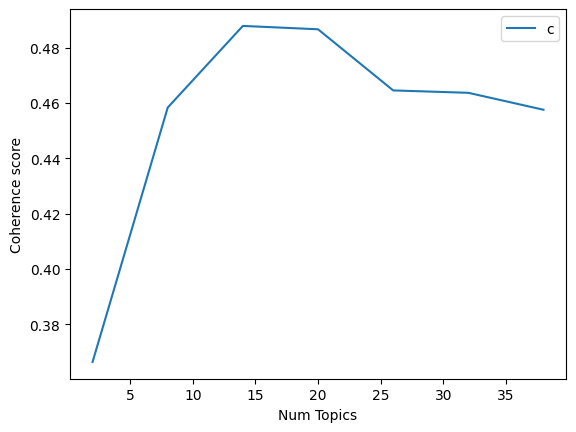

In [137]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#seem

## Running LDA using TF-IDF ##

In [138]:
lda_model_tfidf = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus_tfidf,
    num_topics=100
    ,
    id2word=dictionary,
    passes=50,  # Nilai yang ditingkatkan
    workers=4
)

In [139]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.098*"kendaraan" + 0.057*"syarat" + 0.045*"nomor" + 0.045*"memenuhi" + 0.042*"aplikasi" + 0.040*"calon" + 0.037*"kualitas" + 0.036*"lokal" + 0.031*"produksi" + 0.026*"wajib"


Topic: 1 Word: 0.046*"prabowo" + 0.031*"hati" + 0.031*"operasi" + 0.030*"istri" + 0.029*"tata" + 0.028*"merasa" + 0.026*"senang" + 0.025*"kelola" + 0.024*"ruang" + 0.024*"status"


Topic: 2 Word: 0.057*"anggaran" + 0.046*"partai" + 0.044*"anggota" + 0.044*"pembangunan" + 0.044*"bangunan" + 0.044*"dprd" + 0.041*"pagi" + 0.037*"kepala" + 0.027*"hukum" + 0.024*"berupa"


Topic: 3 Word: 0.059*"madrid" + 0.047*"tampil" + 0.047*"klub" + 0.040*"banget" + 0.038*"open" + 0.036*"poin" + 0.032*"main" + 0.032*"fokus" + 0.024*"korea" + 0.023*"yakin"


Topic: 4 Word: 0.204*"nikita" + 0.192*"mirzani" + 0.072*"dugaan" + 0.053*"laporan" + 0.049*"persidangan" + 0.043*"dilaporkan" + 0.039*"pasal" + 0.035*"kuasa" + 0.031*"miliar" + 0.027*"ayat"


Topic: 5 Word: 0.155*"uang" + 0.087*"digunakan" + 0.001*"kebutuhan" + 0

In [140]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.41966027740702033


## classifying sample document using LDA Bag of Words model

In [141]:
# Asumsikan 'documents' sudah didefinisikan dari sel sebelumnya
document_num = 100

# Pastikan nomor dokumen yang dipilih valid
if 1 <= document_num <= len(documents):
    # Ambil dokumen asli (sebagai string)
    doc_sample_string = documents[document_num - 1]

    print("Original document:")
    print(doc_sample_string)

    print("\n\nTokenized and lemmatized document:")
    # Panggil fungsi preprocess dengan string asli
    print(preprocess(doc_sample_string))
else:
    print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

Original document:
Sidang perdana gugatan praperadilan terkait status tersangka dalam kasus korupsi pengadaan laptop Chromebook yang diajukan mantan MendikbudristekNadiem Makarimdigelar hari ini. Persidangan akan digelar di ruang utama pengadilan Negeri Jakarta Selatan. "Benar sudah dijadwalkan sidang pertama permohonan praperadilan nomor 119/Pid.Pra/2025/PN JKT.SEL atas nama Nadiem Anwar Makarim," kata pejabat humas Pengadilan Negeri Jakarta Selatan, Rio Barten saat dikonfirmasi, Jumat (3/10/2025). SCROLL TO CONTINUE WITH CONTENT Sidang rencananya akan digelar pukul 13.00 WIB. Sementara itu, Kejaksaan Agung RI (Kejagung) siap menghadapi sidang praperadilan Nadiem. "InsyaAllah siap hadir," ujar Kapuspenkum Anang Supriatna di Kejagung, Jakarta Selatan, Kamis (2/10). Anang mengatakan surat pemberitahuan dimulainya penyidikan (SPDP) sudah diberikan ke jaksa penuntut umum (JPU) dan KPK. Dia menjamin Kejagung melakukan penyidikan sesuai prosedur. "SPDP sudah dikasih, selama ini SPDP kan tid

In [142]:
for i in range(len(bow_corpus)):
    print(f"\nDokumen ke-{i+1}:")
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: tup[1], reverse=True):
        print("\tSkor: {:.4f}\t Topik: {}".format(score, lda_model.print_topic(index, 5)))


Dokumen ke-1:
	Skor: 0.9911	 Topik: 0.052*"tata" + 0.043*"kelola" + 0.034*"prabowo" + 0.034*"daerah" + 0.034*"diajukan"

Dokumen ke-2:
	Skor: 0.9804	 Topik: 0.175*"korban" + 0.117*"pelaku" + 0.063*"peristiwa" + 0.052*"mengajak" + 0.043*"berlanjut"

Dokumen ke-3:
	Skor: 0.7050	 Topik: 0.038*"gedung" + 0.032*"jenderal" + 0.031*"minta" + 0.029*"rangkaian" + 0.026*"serangan"
	Skor: 0.2632	 Topik: 0.168*"titik" + 0.160*"korban" + 0.076*"bangunan" + 0.067*"ditemukan" + 0.062*"baca"

Dokumen ke-4:
	Skor: 0.9914	 Topik: 0.113*"undang" + 0.051*"nomor" + 0.034*"korupsi" + 0.034*"sebagaimana" + 0.034*"pidana"

Dokumen ke-5:
	Skor: 0.9888	 Topik: 0.030*"tersangka" + 0.025*"saling" + 0.025*"asep" + 0.024*"benar" + 0.023*"korupsi"

Dokumen ke-6:
	Skor: 0.9914	 Topik: 0.085*"uang" + 0.060*"khusus" + 0.060*"perusahaan" + 0.030*"korupsi" + 0.030*"daerah"

Dokumen ke-7:
	Skor: 0.9925	 Topik: 0.138*"selaku" + 0.107*"swasta" + 0.098*"dprd" + 0.097*"kabupaten" + 0.076*"anggota"

Dokumen ke-8:
	Skor: 0.429

In [143]:
lda_model[bow_corpus[document_num]]

[(242, 0.98735344)]

In [144]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(242, 0.9873528)]

In [145]:
lda_model.print_topic(index, 581)

'0.240*"korban" + 0.234*"dugaan" + 0.119*"laporan" + 0.105*"diduga" + 0.072*"berita" + 0.048*"kepala" + 0.048*"minggu" + 0.027*"minta" + 0.024*"sppg" + 0.024*"maaf" + 0.024*"luka" + 0.000*"berlaku" + 0.000*"anggota" + 0.000*"kegiatan" + 0.000*"mengikuti" + 0.000*"bumn" + 0.000*"ucap" + 0.000*"komunitas" + 0.000*"kuasa" + 0.000*"mata" + 0.000*"baca" + 0.000*"hukum" + 0.000*"rapat" + 0.000*"badan" + 0.000*"undang" + 0.000*"terbuka" + 0.000*"wartawan" + 0.000*"meminta" + 0.000*"berubah" + 0.000*"september" + 0.000*"pengaturan" + 0.000*"dirinya" + 0.000*"perubahan" + 0.000*"berinisial" + 0.000*"peristiwa" + 0.000*"nomor" + 0.000*"bermula" + 0.000*"keempat" + 0.000*"keluarga" + 0.000*"milik" + 0.000*"usaha" + 0.000*"sulawesi" + 0.000*"pengawasan" + 0.000*"utara" + 0.000*"jawab" + 0.000*"penyelidikan" + 0.000*"buka" + 0.000*"izin" + 0.000*"polres" + 0.000*"otomatis" + 0.000*"status" + 0.000*"nggak" + 0.000*"tegasnya" + 0.000*"poin" + 0.000*"peserta" + 0.000*"putusan" + 0.000*"senayan" + 0.00

## classifying sample document using LDA TF-IDF model##

In [146]:
# Cek hasil dari model
result = lda_model_tfidf[bow_corpus[document_num]]
print(f"Hasil dari model: {result}")

# Jika hasilnya tidak kosong, jalankan perulangan
if result:
    for index, score in sorted(result, key=lambda tup: tup[1], reverse=True):
        print(f"Skor: {score}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")

Hasil dari model: [(1, 0.34197), (2, 0.035932716), (11, 0.021458916), (14, 0.025125263), (36, 0.06262651), (50, 0.12513436), (57, 0.037112687), (58, 0.025117856), (62, 0.012614793), (69, 0.038316093), (78, 0.082572594), (79, 0.06722383), (86, 0.055349957), (89, 0.050128743)]
Skor: 0.3419699966907501	Topik: 0.046*"prabowo" + 0.031*"hati" + 0.031*"operasi" + 0.030*"istri" + 0.029*"tata"
Skor: 0.12513436377048492	Topik: 0.057*"motor" + 0.056*"internasional" + 0.056*"global" + 0.047*"bangsa" + 0.041*"memperkuat"
Skor: 0.08257259428501129	Topik: 0.094*"korban" + 0.077*"pelaku" + 0.066*"metro" + 0.041*"polda" + 0.039*"kompol"
Skor: 0.06722383201122284	Topik: 0.105*"bumn" + 0.048*"desa" + 0.040*"bintang" + 0.038*"kategori" + 0.032*"milik"
Skor: 0.06262651085853577	Topik: 0.125*"sppg" + 0.098*"gizi" + 0.094*"keracunan" + 0.058*"makan" + 0.058*"bergizi"
Skor: 0.05534995719790459	Topik: 0.039*"tersangka" + 0.032*"selaku" + 0.027*"mendukung" + 0.026*"publik" + 0.026*"produk"
Skor: 0.0501287430524

## Testing model on unseen document ##

In [147]:
unseen_documents = unseen_documents = [
    "Harga Honda Vario September 2025, Mulai Rp 24 Jutaan" ,
    "Pebalap MotoGP Marc Marquez berhasil menjuarai balapan." ,
    "Apple merilis iPhone baru dengan fitur canggih."
]

# Lakukan perulangan untuk setiap dokumen
for i, unseen_doc in enumerate(unseen_documents):
    # Proses setiap dokumen secara terpisah
    bow_vector = dictionary.doc2bow(preprocess(unseen_doc))

    # Cetak judul atau nomor dokumen untuk kejelasan
    print(f"\n--- Analisis Dokumen ke-{i+1} ({unseen_doc}) ---")

    # Cetak hasil jika ada
    if bow_vector:
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: tup[1], reverse=True):
            print(f"Skor: {score:.4f}\t Topik: {lda_model_tfidf.print_topic(index, 5)}")
    else:
        print("Tidak ada kata yang terdeteksi di dokumen ini.")


--- Analisis Dokumen ke-1 (Harga Honda Vario September 2025, Mulai Rp 24 Jutaan) ---
Skor: 0.2525	 Topik: 0.277*"harga" + 0.095*"masing" + 0.029*"juta" + 0.024*"nilai" + 0.023*"jual"
Skor: 0.2525	 Topik: 0.252*"instagram" + 0.058*"dilihat" + 0.053*"september" + 0.053*"miliknya" + 0.041*"kasih"
Skor: 0.2525	 Topik: 0.080*"marquez" + 0.041*"marc" + 0.032*"rider" + 0.032*"pebalap" + 0.031*"balapan"

--- Analisis Dokumen ke-2 (Pebalap MotoGP Marc Marquez berhasil menjuarai balapan.) ---
Skor: 0.6683	 Topik: 0.080*"marquez" + 0.041*"marc" + 0.032*"rider" + 0.032*"pebalap" + 0.031*"balapan"
Skor: 0.1683	 Topik: 0.069*"real" + 0.063*"titik" + 0.053*"nggak" + 0.051*"keduanya" + 0.047*"delapan"

--- Analisis Dokumen ke-3 (Apple merilis iPhone baru dengan fitur canggih.) ---
Tidak ada kata yang terdeteksi di dokumen ini.


## Tugas LDA

In [148]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer
import io
from google.colab import files

try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception as e:
    print(f"Gagal mengunduh data NLTK: {e}")

try:
    data = pd.read_csv('preprocessing_crawling_pta.csv', on_bad_lines='skip')
    documents = data['isi_berita_original'].values.tolist()
    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []

# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    kamus = Dictionary(data_token)
    kamus.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
    korpus = [kamus.doc2bow(teks) for teks in data_token]

    num_topik = 20
    lda_model = LdaModel(
        korpus,
        num_topics=num_topik,
        id2word=kamus,
        passes=50,
        random_state=100
    )

    # --- Bagian 3: Membuat Tabel Proporsi Kata dalam Topik ---
    all_topics = lda_model.show_topics(num_topics=num_topik, num_words=20, formatted=False)

    proporsi_kata = []
    for topic_id, word_weights in all_topics:
        for word, weight in word_weights:
            proporsi_kata.append([f"Topik {topic_id}", word, weight])

    df_proporsi_kata = pd.DataFrame(proporsi_kata, columns=['Topik', 'Kata', 'Proporsi'])
    print("\n--- Tabel 1: Proporsi Kata dalam Topik ---")
    print(df_proporsi_kata)

    # --- Bagian 4: Membuat Tabel Proporsi Topik dalam Dokumen ---
    proporsi_topik = []
    for i, doc_bow in enumerate(korpus):
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)

        row_data = {'Dokumen ID': i}
        for topic_id, proporsi in doc_topics:
            row_data[f"Topik {topic_id}"] = proporsi

        proporsi_topik.append(row_data)

    df_proporsi_topik = pd.DataFrame(proporsi_topik).fillna(0)
    cols = ['Dokumen ID'] + [f'Topik {i}' for i in range(num_topik)]
    df_proporsi_topik = df_proporsi_topik[cols]
    print("\n--- Tabel 2: Proporsi Topik dalam Dokumen ---")
    print(df_proporsi_topik)

    # --- Bagian 5: Menyimpan dan Mengunduh File CSV Otomatis ---
    # Simpan DataFrame pertama ke file CSV yang berbeda
    csv_file1 = "proporsi_dokumen.csv"
    df_proporsi_topik.to_csv(csv_file1, index=False)

    # Simpan DataFrame kedua ke file CSV yang berbeda
    csv_file2 = "proporsi_kata.csv"
    df_proporsi_kata.to_csv(csv_file2, index=False)

    print(f"\nFile '{csv_file1}' dan '{csv_file2}' berhasil dibuat dan siap diunduh.")

    # Anda bisa menggunakan kode ini untuk mengunduh file secara terpisah
    # files.download(csv_file1)
    # files.download(csv_file2)

else:
    print("Tidak dapat melanjutkan karena data dokumen tidak tersedia.")

Total 625 dokumen berhasil dimuat.

--- Tabel 1: Proporsi Kata dalam Topik ---
        Topik        Kata  Proporsi
0     Topik 0   pertamina  0.056024
1     Topik 0       rossi  0.050389
2     Topik 0       erick  0.043410
3     Topik 0  pendidikan  0.029251
4     Topik 0      thohir  0.021714
..        ...         ...       ...
395  Topik 19      status  0.015136
396  Topik 19  pengawasan  0.014366
397  Topik 19     sasaran  0.012348
398  Topik 19     berubah  0.012087
399  Topik 19       usaha  0.011789

[400 rows x 3 columns]

--- Tabel 2: Proporsi Topik dalam Dokumen ---
     Dokumen ID   Topik 0   Topik 1   Topik 2   Topik 3   Topik 4   Topik 5  \
0             0  0.000481  0.000481  0.351007  0.000481  0.000481  0.000481   
1             1  0.001111  0.001111  0.001111  0.001111  0.001111  0.001111   
2             2  0.001471  0.001471  0.087355  0.001471  0.208652  0.001471   
3             3  0.000446  0.000446  0.000446  0.000446  0.000446  0.742503   
4             4  0.1189

## Klasifikasi

In [149]:
!pip install gensim scikit-learn pandas

In [154]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ast
import gensim
from gensim.utils import simple_preprocess
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore")

# --- 1. Memuat dan Menyiapkan Data ---
file_path = 'preprocessing_crawling_pta.csv'   # pastikan file ini sudah diupload di Colab
text_column = 'isi_berita_tokens'               # kolom berisi teks/token
label_column = 'kategori_berita'                # kolom label kategori

try:
    df = pd.read_csv(file_path)
    if text_column not in df.columns or label_column not in df.columns:
        print(f"❌ Error: Kolom '{text_column}' atau '{label_column}' tidak ditemukan.")
        print(f"Kolom tersedia: {list(df.columns)}")
        raise SystemExit
    df = df[[text_column, label_column]].copy()
    print("✅ Data berhasil dimuat.")
except FileNotFoundError:
    raise SystemExit(f"❌ File '{file_path}' tidak ditemukan di direktori kerja.")

# --- 2. Normalisasi Kolom Token ---
def detect_list_format(sample):
    """Deteksi apakah kolom berisi list (misalnya ['kata']) atau teks biasa."""
    if isinstance(sample, str) and sample.strip().startswith('[') and sample.strip().endswith(']'):
        return "list"
    return "text"

if not df[text_column].dropna().empty:
    sample_data = str(df[text_column].dropna().iloc[0])
    data_format = detect_list_format(sample_data)
else:
    data_format = "unknown"

print(f"📄 Format data terdeteksi: {data_format}")

def normalize_tokens(value):
    """Pastikan setiap entri menjadi list token yang valid."""
    if isinstance(value, list):
        return [t for t in value if isinstance(t, str) and t.strip() != ""]
    if isinstance(value, str):
        value = value.strip()
        if value.startswith('[') and value.endswith(']'):
            try:
                parsed = ast.literal_eval(value)
                if isinstance(parsed, list):
                    return [t for t in parsed if isinstance(t, str) and t.strip() != ""]
            except Exception:
                pass
        # Jika string biasa, tokenize dengan gensim
        return simple_preprocess(value)
    return []

# Terapkan normalisasi
df['tokens'] = df[text_column].apply(normalize_tokens)

# Hitung jumlah dokumen kosong & tidak kosong
total_docs = len(df)
nonempty_docs = df['tokens'].apply(len).gt(0).sum()
empty_docs = total_docs - nonempty_docs
print(f"📊 Total dokumen: {total_docs}, Non-kosong: {nonempty_docs}, Kosong: {empty_docs}")

# Hapus baris kosong
df = df[df['tokens'].apply(len) > 0].reset_index(drop=True)
if df.empty:
    raise SystemExit("❌ Tidak ada dokumen berisi token setelah normalisasi. Periksa isi file CSV.")

# --- 3. Membuat Dictionary & Corpus untuk LDA ---
dictionary = gensim.corpora.Dictionary(df['tokens'])
if len(dictionary) == 0:
    raise SystemExit("❌ Dictionary kosong. Tidak ada kata yang bisa dipelajari.")
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
print(f"📘 Jumlah term unik: {len(dictionary)} | Jumlah dokumen: {len(corpus)}")

# --- 4. Pelatihan Model LDA ---
num_topics = min(8, len(df[label_column].unique()))  # jumlah topik disesuaikan jumlah kategori
workers = max(1, min(4, os.cpu_count() or 1))

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=625,
    workers=workers,
    random_state=42
)

print("✅ Model LDA berhasil dilatih.")

# --- 5. Mendapatkan vektor topik untuk setiap dokumen ---
def get_topic_vector(lda_model, bow_vector, num_topics):
    topic_weights = np.zeros(num_topics)
    topic_scores = lda_model.get_document_topics(bow_vector)
    for topic_id, score in topic_scores:
        if 0 <= topic_id < num_topics:
            topic_weights[topic_id] = score
    return topic_weights

X = np.array([get_topic_vector(lda_model, doc, num_topics) for doc in corpus])
y = df[label_column].values

# --- 6. Pelatihan & Evaluasi Logistic Regression ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 7. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\n--- 📈 Hasil Klasifikasi ---")
print(f"Akurasi Model: {accuracy:.4f}\n")
print("Laporan Klasifikasi:")
print(report)

# --- 8. Menampilkan Top Kata Tiap Topik ---
print("\n--- 🔍 Top Kata per Topik (Top 10) ---")
for t in range(num_topics):
    print(f"Topik {t}: ", [word for word, prob in lda_model.show_topic(t, topn=10)])

print("\n✅ Proses selesai tanpa error atau warning.")


✅ Data berhasil dimuat.
📄 Format data terdeteksi: text
📊 Total dokumen: 625, Non-kosong: 625, Kosong: 0
📘 Jumlah term unik: 15991 | Jumlah dokumen: 625
✅ Model LDA berhasil dilatih.

--- 📈 Hasil Klasifikasi ---
Akurasi Model: 0.4320

Laporan Klasifikasi:
               precision    recall  f1-score   support

      ekonomi       0.43      0.67      0.52        18
      hiburan       0.40      0.67      0.50        18
        hukum       0.00      0.00      0.00         1
internasional       0.00      0.00      0.00        13
     olahraga       0.38      0.35      0.36        17
     otomotif       0.50      0.37      0.42        19
      politik       0.25      0.20      0.22        20
    sepakbola       0.65      0.68      0.67        19

     accuracy                           0.43       125
    macro avg       0.33      0.37      0.34       125
 weighted avg       0.39      0.43      0.40       125


--- 🔍 Top Kata per Topik (Top 10) ---
Topik 0:  ['di', 'dan', 'yang', 'ppp', 'itu